In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC


In [4]:

X = pd.read_csv("../dataset/extracted_features.csv").values
index_for_removal = np.array(
    [
        0, 10, 14, 17, 25, 26, 35, 39, 49, 59, 62,
    ]
)
X_indexed = np.delete(X, index_for_removal, 1)

y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(
    X_indexed, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)
y_train = y_train.ravel()

select = SelectPercentile(percentile=90)
select.fit(X_train, y_train)
X_train = select.transform(X_train)
X_test = select.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=200,
    max_features=3,
).fit(X_train, y_train)

select_sfm = SelectFromModel(
    rf,
    threshold='0.1*mean',
)
select_sfm.fit(X_train, y_train)
X_train = select_sfm.transform(X_train)
X_test = select_sfm.transform(X_test)

select_rfe = RFE(
    RandomForestClassifier(
        n_estimators=200, random_state=42
    ), n_features_to_select=40
)

select_rfe.fit(X_train, y_train)
X_train = select_rfe.transform(X_train)
X_test = select_rfe.transform(X_test)

scaler_standard = StandardScaler().fit(X_train)
X_train_standard = scaler_standard.transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

scaler_robust = RobustScaler().fit(X_train)
X_train_robust = scaler_robust.transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

scaler_minmax = MinMaxScaler().fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

pca = PCA(n_components=37, random_state=42)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

In [5]:
np.random.seed(42)

def lsvc_explore_and_graph(c_vals, X_train_data):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(LinearSVC(), hyperparameters, cv=5)
    clf.fit(X_train_data, y_train)
    cv_scores = clf.cv_results_['mean_test_score']
    cv_standard_deviations = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']

    print("Best C: ", optimal_c_val)
    print("Train score: ", LinearSVC(C=optimal_c_val).fit(X_train_data, y_train).score(X_train_data, y_train))

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.plot(c_vals, cv_scores)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.plot(c_vals, cv_standard_deviations)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Standard Deviation')
    plt.show()


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  2.636650898730358
Train score:  0.9211267605633803


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


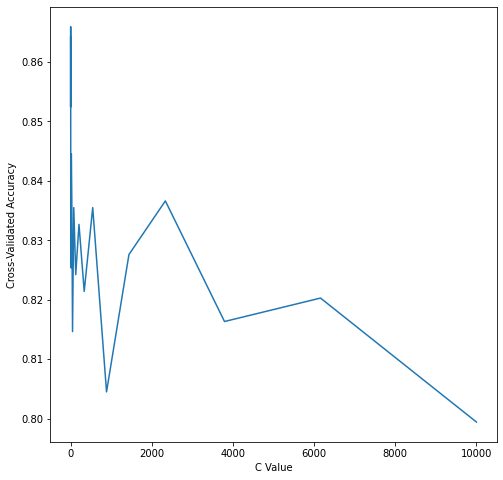

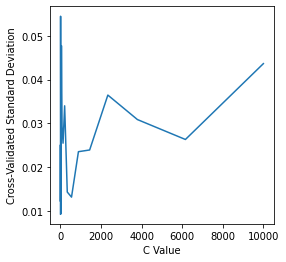

In [6]:
lsvc_explore_and_graph(np.logspace(0, 4, 20), X_train)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.00206913808111479
Train score:  0.9459154929577465


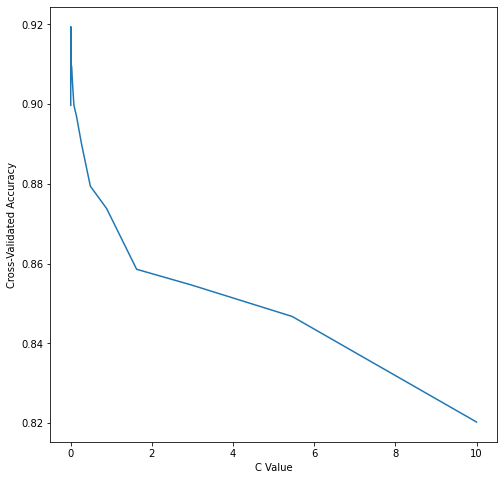

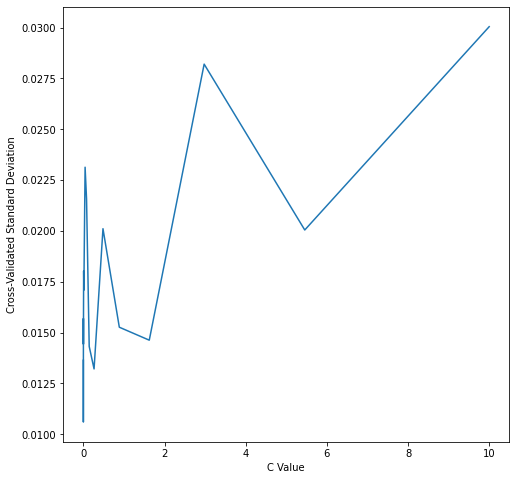

In [8]:
lsvc_explore_and_graph(np.logspace(-4, 1, 20), X_train)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.4081632653061224
Train score:  0.9273239436619718


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


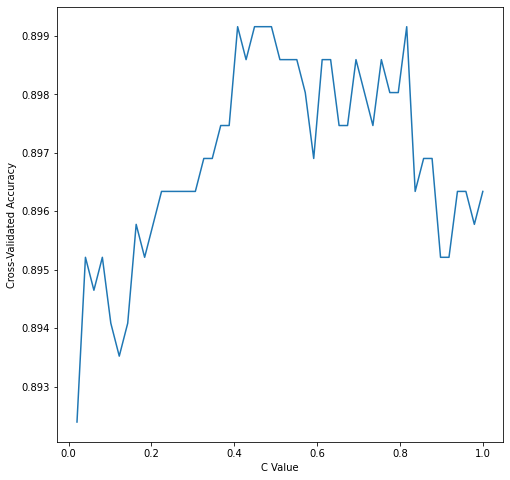

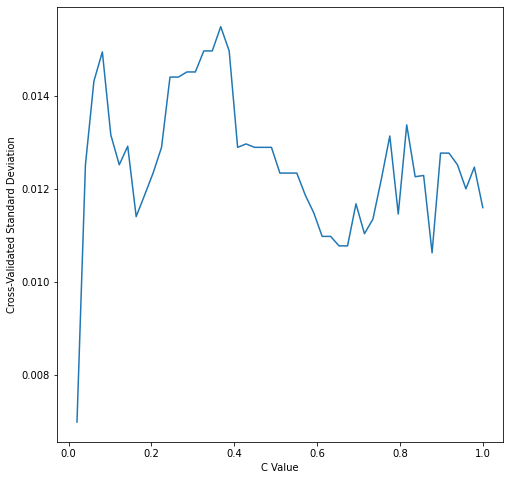

In [6]:
lsvc_explore_and_graph(np.linspace(0, 1, 50), X_train_pca)


In [10]:
np.random.seed(42)

lsvc = LinearSVC(C=0.02040816326530612).fit(X_train, y_train)
print(
    "LSVC best training score: ",
    lsvc.score(X_train, y_train)
)
print(
    "LSVC best test score: ",
    lsvc.score(X_test, y_test)
)

LSVC best training score:  0.9515492957746479
LSVC best test score:  0.9121621621621622


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.061224489795918366
Train score:  0.9391549295774648


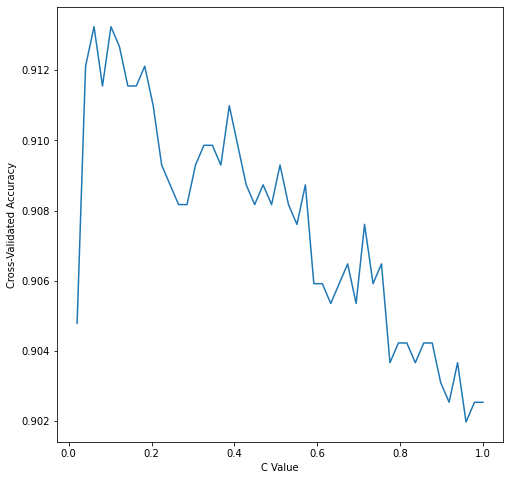

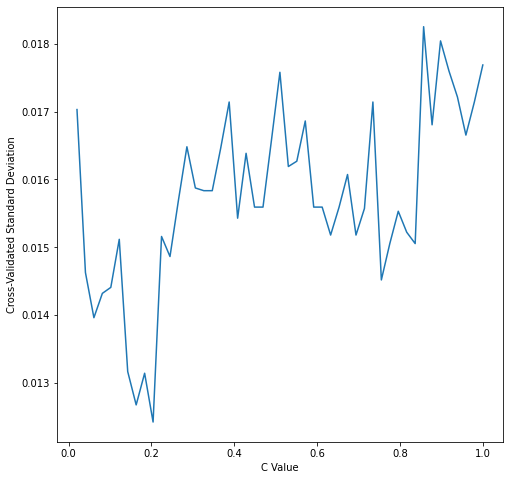

In [7]:
lsvc_explore_and_graph(np.linspace(0, 1, 50), X_train_standard)


In [9]:
lsvc_standard = LinearSVC(C=0.061224489795918366).fit(X_train_standard, y_train)

print(lsvc_standard.score(X_train_standard, y_train))
print(lsvc_standard.score(X_test_standard, y_test))


0.9391549295774648
0.9166666666666666


robust

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.04081632653061224
Train score:  0.9442253521126761


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


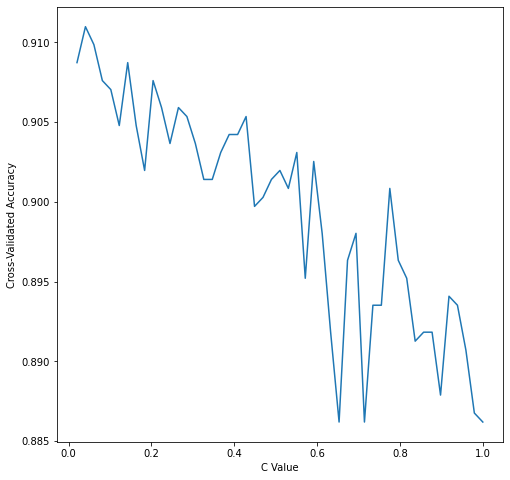

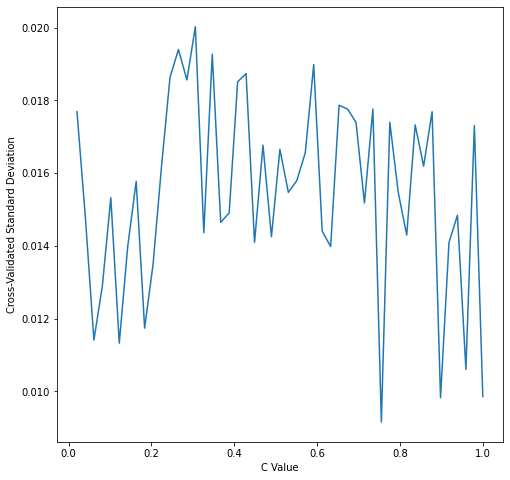

In [10]:
lsvc_explore_and_graph(np.linspace(0, 1, 50), X_train_robust)


In [11]:

lsvc_robust = LinearSVC(C=0.04081632653061224).fit(X_train_robust, y_train)

print(lsvc_robust.score(X_train_robust, y_train))
print(lsvc_robust.score(X_test_robust, y_test))


0.9447887323943662
0.9076576576576577


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


minmax

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best C:  1.6326530612244898
Train score:  0.9391549295774648


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/Users/engineer/workspace

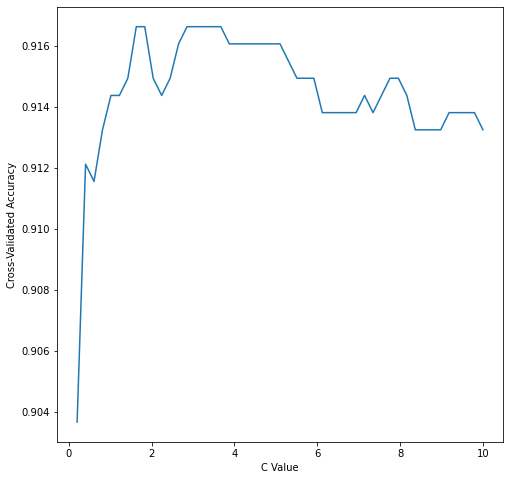

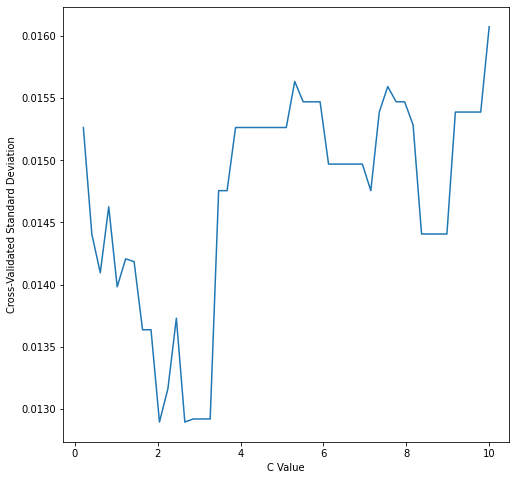

In [13]:
lsvc_explore_and_graph(np.linspace(0, 10, 50), X_train_minmax)


In [14]:

lsvc_minmax = LinearSVC(C=1.6326530612244898).fit(X_train_minmax, y_train)

print(lsvc_minmax.score(X_train_minmax, y_train))
print(lsvc_minmax.score(X_test_minmax, y_test))


0.9391549295774648
0.9211711711711712


PCA

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to co

Best C:  0.061224489795918366
Train score:  0.9391549295774648


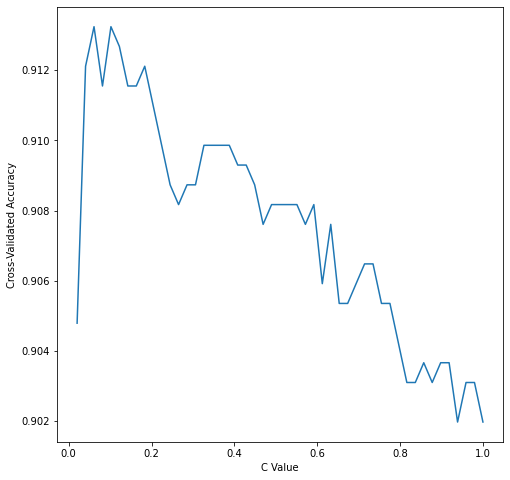

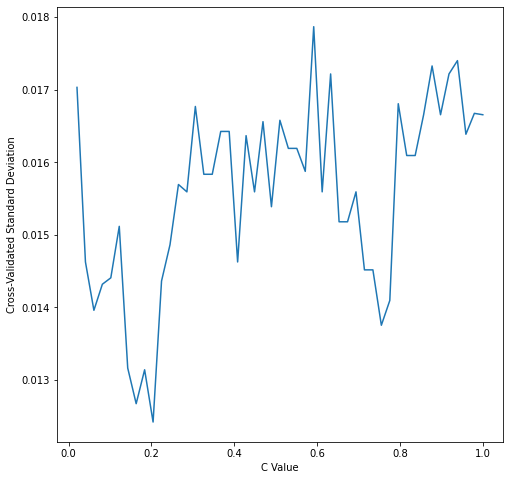

In [15]:
lsvc_explore_and_graph(np.linspace(0, 1, 50), X_train_pca)


In [16]:

lsvc_pca = LinearSVC(C=0.061224489795918366).fit(X_train_pca, y_train)

print(lsvc_pca.score(X_train_pca, y_train))
print(lsvc_pca.score(X_test_pca, y_test))

0.9391549295774648
0.9166666666666666
